### **Initial Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
from PIL import Image

import os
import pathlib

In [ ]:
# !pip freeze

## variable and path Initialization

Paths of the image folders

In [ ]:
datapath = "/content/drive/MyDrive/Datathon 2023/Data"
IMAGE_SIZE = [224,224] # Image input shape

## Initial EDA

This EDA is made to check out the 
  - Number of image distributions among classes : There is clearly a class imbalance since acne class hass only 400 images while other classes have relatively high and equal number of images
  - Image size distributions : Image sizes also variying class to class

Need to balance number of images for each classes. 

Also, disease classes have less number of images to train a deep learning model. Need to augment the data to increase the data. 




In [ ]:
# Initial Data
number_classes = {'Acne': len(os.listdir(f'{datapath}/Acne')),
'Cyst': len(os.listdir(f'{datapath}/Cyst, tumour and skin-tags')),
'Melanoma': len(os.listdir(f'{datapath}/Melanoma')),
'Monkeypox': len(os.listdir(f'{datapath}/Monkeypox')),
'Normal skin': len(os.listdir(f'{datapath}/Normal skin'))}

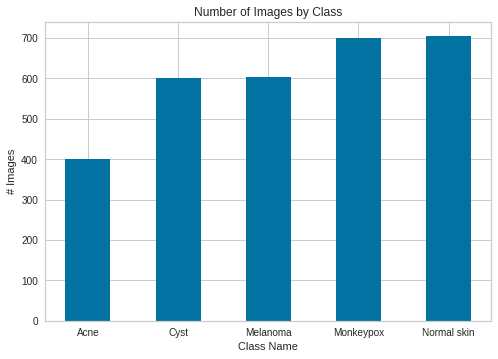

In [ ]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [ ]:
#Image dimensions
directories = {'Acne': f'{datapath}/Acne/',
'Cyst': f'{datapath}/Cyst, tumour and skin-tags/',
'Melanoma': f'{datapath}/Melanoma/',
'Monkeypox': f'{datapath}/Monkeypox/',
'Normal skin': f'{datapath}/Normal skin/'}

def get_dims(file):
  """Returns dimenstions for an RBG image"""
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w  

[########################################] | 100% Completed |  5.4s


[########################################] | 100% Completed |  8.3s


[########################################] | 100% Completed | 31.4s


[########################################] | 100% Completed | 10.0s


[########################################] | 100% Completed | 12.1s


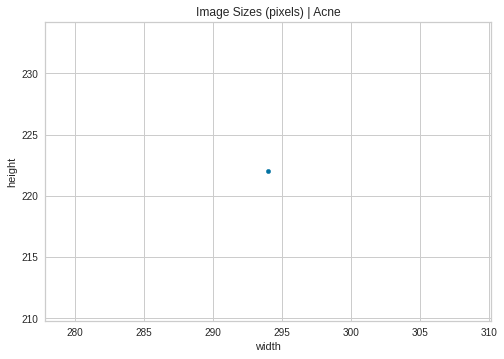

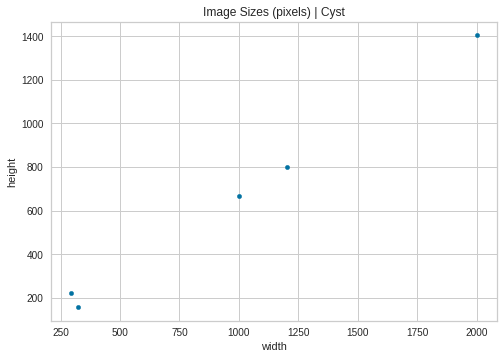

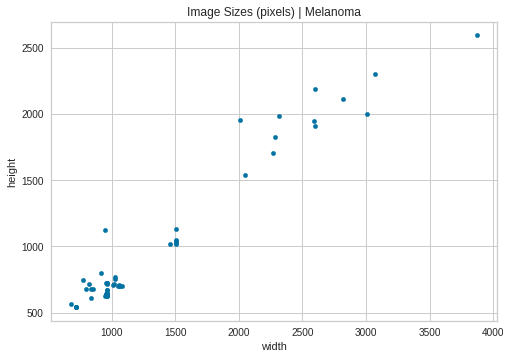

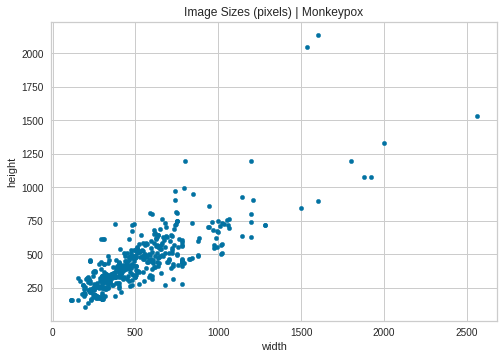

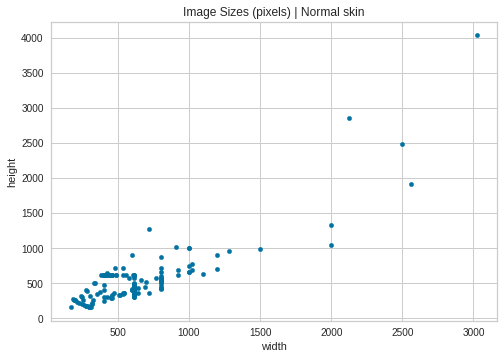

In [ ]:
import pandas as pd
import dask.bag as bag
import dask.diagnostics as diagnostics

for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]

  dims = bag.from_sequence(filelist).map(get_dims)
  with diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

## Data Augmentation

Since classes have imbalance data and less number of images this image augmentation is done. This image augmentation will use the existing data to create new data. Some of the exaples are like transposing the picture so that the model will understand the image as a completely new image.

Since classes have different number of images we thought to augment the data so that the final augmented data will have equal amount of large data for each classes.

In [ ]:
#Initial data path and the path to save the augmented images
datapath = "/content/drive/MyDrive/Datathon 2023/Data"
augmentpath = "/content/drive/MyDrive/Datathon 2023/augmentedimages"

In [ ]:
import os
import pandas as pd

In [ ]:
# This method will get all the images from the sub folders
def getlistofimages(path):
    filelist = [path + f for f in os.listdir(path)]
    return filelist

In [ ]:
''' Initialising the ImageDataGenerator class. 
We will pass in the augmentation parameters in the constructor. '''
datagen = ImageDataGenerator( 
        rotation_range = 40, 
        shear_range = 0.2, 
        zoom_range = 0.2, 
        horizontal_flip = True, 
        brightness_range = (0.5, 1.5)) 

#Method to augment the classes
def augmentor(list_of_files, save_dir, prefix, rounds, datagen=datagen):
  for file in list_of_files:
      img = image.load_img(file)  # this is a PIL image
      x = image.img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
      x = x.reshape((1, ) + x.shape)
      i = 0
      for batch in datagen.flow(x, batch_size = 1, save_to_dir = save_dir,  save_prefix =prefix, save_format ='jpg'):
      #x += 1
          i += 1
          if i >= rounds: 
              break

In [ ]:
directories = {'Acne': f'{datapath}/Acne/',
'Cyst': f'{datapath}/Cyst, tumour and skin-tags/',
'Melanoma': f'{datapath}/Melanoma/',
'Monkeypox': f'{datapath}/Monkeypox/',
'Normal skin': f'{datapath}/Normal skin/'}

In [ ]:
#Image generation

for name,path in directories.items() :
  filelist = [path + f for f in os.listdir(path)]
  if name in ['Acne']:
    rounds = 21
  elif name in ['Cyst', 'Melanoma']:
    rounds = 14
  elif name in ['Monkeypox','Normal skin']:
    rounds = 12
  
  list_of_images = getlistofimages(path)
  augmentor(list_of_files = list_of_images, save_dir = f"{augmentpath}/{name}", prefix = name, rounds = rounds)

After the image augmentation almost all classes have equal amount of large data

In [ ]:
path = "/content/drive/MyDrive/Datathon 2023/augmentedFinalData/train"

In [ ]:
# After augmentation
number_classes = {'Acne': len(os.listdir(f'{path}/Acne')),
'Cyst': len(os.listdir(f'{path}/Cyst')),
'Melanoma': len(os.listdir(f'{path}/Melanoma')),
'Monkeypox': len(os.listdir(f'{path}/Monkeypox')),
'Normal skin': len(os.listdir(f'{path}/Normal skin'))}

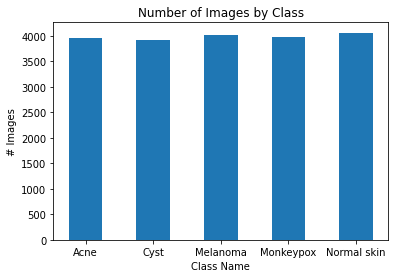

In [ ]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [ ]:
#Image dimensions after augmentation
directories = {'Acne': f'{path}/Acne/',
'Cyst': f'{path}/Cyst/',
'Melanoma': f'{path}/Melanoma/',
'Monkeypox': f'{path}/Monkeypox/',
'Normal skin': f'{path}/Normal skin/'}

def get_dims(file):
  """Returns dimenstions for an RBG image"""
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w  

[########################################] | 100% Completed | 59.8s
[########################################] | 100% Completed |  1min 12.2s
[########################################] | 100% Completed |  2min 20.7s
[########################################] | 100% Completed |  1min 24.5s
[########################################] | 100% Completed |  1min 27.9s


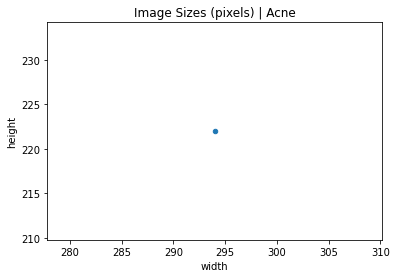

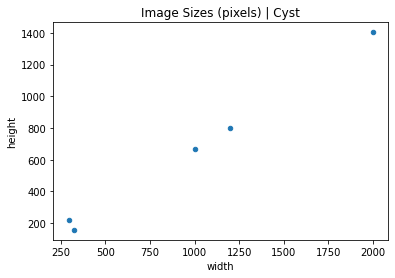

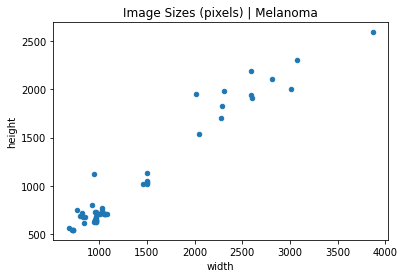

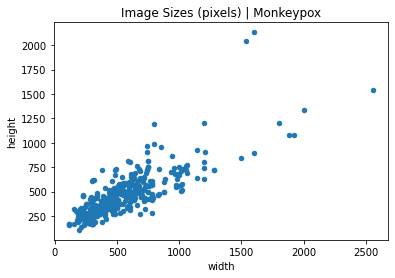

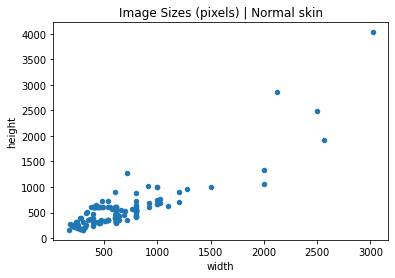

In [ ]:
import pandas as pd
import dask.bag as bag
import dask.diagnostics as diagnostics

for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]

  dims = bag.from_sequence(filelist).map(get_dims)
  with diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

## Spliting folders

Since we have one unified folder using the python library spilit-folders splitting the main classes into 3 subclasses such as,
- Train(to train the model), 
- Val(validation images while training the model), 
- Test(images that are never seen by the model to check the accuracy of the model).

Data has been splited between these classes in a ratio of 70%, 20%, 10% respectively.

In [ ]:
!pip install split-folders

In [ ]:
images = "/content/drive/MyDrive/Datathon 2023/augmentedimages"

#train test split
import splitfolders

splitfolders.ratio(images, output="/content/drive/MyDrive/Datathon 2023/augmentedFinalData/", ratio = (.7,.2,.1), move = False)


In [ ]:
pathbase = "/content/drive/MyDrive/Datathon 2023/augmentedFinalData"
folders = glob(f'{pathbase}/train/*')
train_path = f'{pathbase}/train'
valid_path = f'{pathbase}/val'
test_path = f'{pathbase}/test'

## Class Image visualization

Images of each classes are printed to see the data before processing.

In [ ]:
data_dir = pathlib.Path(train_path)
data_dir

PosixPath('/content/drive/MyDrive/Datathon 2023/augmentedFinalData/train')

In [ ]:
Acne = list(data_dir.glob("Acne/*"))[:10]
Cyst_tumour_and_skintags = list(data_dir.glob("Cyst/*"))[:10]
Monkeypox = list(data_dir.glob("Monkeypox/*"))[:10]
Melanoma = list(data_dir.glob("Melanoma/*"))[:10]
Normal_skin = list(data_dir.glob("Normal skin/*"))[:10]

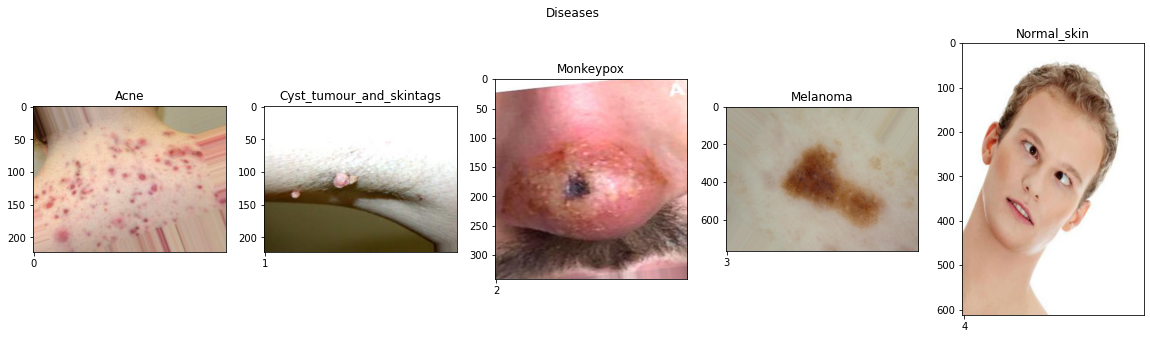

In [ ]:
#Plot
fig, ax = plt.subplots(1,5, figsize=(20,5))

fig.suptitle('Diseases')

labels = ['Acne', 'Cyst_tumour_and_skintags', 'Monkeypox', 'Melanoma', 'Normal_skin'] 

# Reading images
Acne_image = img.imread(Acne[0])
Cyst_tumour_and_skintags_image = img.imread(Cyst_tumour_and_skintags[0])
Monkeypox_image = img.imread(Monkeypox[0])
Melanoma_image = img.imread(Melanoma[0])
Normal_skin_image = img.imread(Normal_skin[0])


images = [Acne_image, Cyst_tumour_and_skintags_image, Monkeypox_image, Melanoma_image, Normal_skin_image]
 
# Showing images
for i in range (5):
    ax[i].imshow(images[i])

# Remove ticks  
for i in range (5):
    ax[i].set_xticks([i])

# Label axes
for i in range (5):
    ax[i].set_title(labels[i])

plt.show()

## Model Import

Deep learning is resource intensive task and training a model form the scratch will use more resources and time. To over come this issue we deided to go with the transfer learning technique. Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

To address this problem we have tried many transformer models such as VGG16, VGG19, InceptionV3, EfficientNetB7. Instead of training this large data we first ran all the transformer models with the initial data to check the accuracy. VGG16 and Inception V3 gives us romising results and thus we choose to go with this model. We are using the imagenet weights as initial weights to train the model.

In [ ]:
#VGG model import and model summary
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)

prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs= prediction)

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

## Data initialization

All the data are initialized at this point. Since we have variations in image sizes we are inputting all the data with the resolution of 224*224. Also, the transfer learning models that we are using were trained using this specific resolution. So the model expects the images to be in this resolution. 

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size =32,
                                                 class_mode ='categorical')

valid_set = valid_datagen.flow_from_directory(valid_path,
                                                 target_size = (224,224),
                                                 batch_size =32,
                                                 class_mode ='categorical')

Found 19916 images belonging to 5 classes.
Found 5688 images belonging to 5 classes.


Early stopping 
- Early stopping is a technique that we use to save the resource allocation when running models. Since deep learning models are resorce expensive we don't need to waste the resources necessarily if the model isn't learning. So we watch the validation loss of the model and when its not changing and having reating patterns we are stopping the learning process early. 

Restore Best Weights 
- When learning different epochs can have different accuracies and we want the best accuracy to rely on the model to take decisions. So that we have als specified to restore teh best weights to teh model.


In [ ]:
# Early stopping
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

## Model Training

In [ ]:
r = model.fit(
    training_set,
    validation_data=valid_set,
    epochs = 10,
    steps_per_epoch=len(training_set),
    validation_steps=len(valid_set),
    callbacks=early_stopping
)

## Accuracies

Accuracy plots and losss plots tell us about the models learning curve, whether the model is over fitting or under fitting. 

- **Underfitting** means that your model makes accurate, but initially incorrect predictions

- **Overfitting** means that your model makes not accurate predictions. In this case, train error is very small and val/test error is large.

- Learning curve of a **good fit model** has a moderately high **training loss** at the beginning which gradually decreases upon adding training examples and flattens gradually, indicating addition of more training examples doesn’t improve the model performance on training data.

- Learning curve of a **good fit model** has a high **validation loss** at the beginning which gradually decreases upon adding training examples and flattens gradually, indicating addition of more training examples doesn’t improve the model performance on unseen data.

As from the plots we are safe to say that the models are not either overfitting nor underfitting.


In [ ]:
#Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [ ]:
#Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


## Model saving and loading

Model needs to be saved at a state so that it can be used later without retraining it.

## VGG 16

In [ ]:
# model_path = '/content/drive/MyDrive/Datathon 2023/Models/'
# model.save('/content/drive/MyDrive/Datathon 2023/Models/vgg16_dt_augmented.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Datathon 2023/Models/vgg16_dt_augmented.h5')

## Image preperation

Before inputting a real word image to the model the image needs to be preprocessed similar to the images that were used to train the model.

In [ ]:
import cv2
import tensorflow as tf

def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255.
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

In [ ]:
# Class dictionary to find the class when outputtig the data
class_dict = {'Acne': 0,
 'Cyst, tumour and skin-tags': 1,
 'Melanoma': 2,
 'Monkeypox': 3,
 'Normal skin': 4}

In [ ]:
# simple method to find the class of the image based on the label
def class_finder(val, dict=class_dict):
  for k,v in dict.items():
    if(int(val) == int(v)):
      print(f'disease is : {k}')

## Test prediction

Test predition on the images from the test set which were not seen by the model.

In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Datathon 2023/FinalData/test/Acne/Acne (173).jpg")])
class_finder(np.argmax(prediction))

1/1 [==============================] - 1s 608ms/step
disease is : Acne


In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Datathon 2023/FinalData/test/Cyst, tumour and skin-tags/skin cyst, tumour and skin-tags (252).jpg")])
class_finder(np.argmax(prediction))

1/1 [==============================] - 0s 499ms/step
disease is : Cyst, tumour and skin-tags


In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Datathon 2023/FinalData/test/Melanoma/Melanoma (2).jpg")])
class_finder(np.argmax(prediction))

1/1 [==============================] - 0s 498ms/step
disease is : Melanoma


In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Datathon 2023/FinalData/test/Monkeypox/Moneypox_1149.jpg")])
class_finder(np.argmax(prediction))

1/1 [==============================] - 0s 497ms/step
disease is : Monkeypox


In [ ]:
prediction = model.predict([prepare("/content/drive/MyDrive/Datathon 2023/FinalData/test/Normal skin/Normal skin_17.jpg")])
class_finder(np.argmax(prediction))

1/1 [==============================] - 0s 497ms/step
disease is : Normal skin


## Confusion Matrix and Model Accuracy checking

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm. Simply by checking the actual class vs the predicted class

In [ ]:
test_path = '/content/drive/MyDrive/Datathon 2023/FinalData/test'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_batches = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            shuffle=False)

Found 303 images belonging to 5 classes.


In [ ]:
test_labels = test_batches.classes
# test_labels

In [ ]:
# make a prediction
predictions = model.predict_generator(test_batches, steps=len(test_batches), verbose=1)

<ipython-input-58-1cf67373e972>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_batches, steps=len(test_batches), verbose=1)


10/10 [==============================] - 144s 14s/step


In [ ]:
predictions.shape

(303, 5)

In [ ]:
from sklearn.metrics import confusion_matrix

# labels = ["Acne", "Cyst_tumour_and_skintags", "Monkeypox", "Melanoma", "Normal_skin"]

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

As seen from this confusion matrix only a few images are misclassified and te models performance is good.

Confusion matrix, without normalization
[[32  7  0  0  1]
 [ 1 45  5  3  6]
 [ 0  0 61  0  0]
 [ 0  3  2 64  2]
 [ 1  0  0  1 69]]


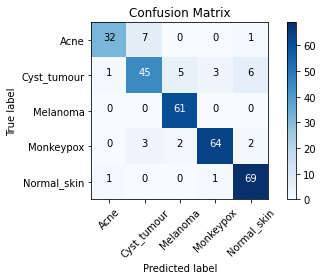

In [ ]:
cm_plot_labels = ["Acne", "Cyst_tumour", "Melanoma", "Monkeypox", "Normal_skin"]

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
test_loss, test_acc = model.evaluate(test_batches, verbose=2)

10/10 - 140s - loss: 0.2663 - accuracy: 0.8944 - 140s/epoch - 14s/step


## classification report
 - A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

Precision	
 - Precision is defined as the ratio of true positives to the sum of true and false positives.

Recall	
 - Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

F1 Score	

 - The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

Support	
 - Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [ ]:
from sklearn.metrics import classification_report

# labels = ["Acne", "Cyst_tumour_and_skintags", "Monkeypox", "Melanoma", "Normal_skin"]

cr = classification_report(test_labels, predictions.argmax(axis=1))

In [ ]:
# Predicting the Test set results

from sklearn.metrics import classification_report


print(classification_report(test_labels, predictions.argmax(axis=1),target_names = cm_plot_labels ))

              precision    recall  f1-score   support

        Acne       0.94      0.80      0.86        40
 Cyst_tumour       0.82      0.75      0.78        60
    Melanoma       0.90      1.00      0.95        61
   Monkeypox       0.94      0.90      0.92        71
 Normal_skin       0.88      0.97      0.93        71

    accuracy                           0.89       303
   macro avg       0.90      0.88      0.89       303
weighted avg       0.89      0.89      0.89       303



## InceptionV3

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Datathon 2023/Models/Inception_Augmented of vgg16_dt.h5')

In [ ]:
test_path = '/content/drive/MyDrive/Datathon 2023/FinalData/test'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_batches = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            shuffle=False)

Found 303 images belonging to 5 classes.


In [ ]:
test_labels = test_batches.classes
# test_labels

In [ ]:
# make a prediction
predictions = model.predict_generator(test_batches, steps=len(test_batches), verbose=1)

<ipython-input-112-1cf67373e972>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_batches, steps=len(test_batches), verbose=1)


10/10 [==============================] - 37s 3s/step


In [ ]:
from sklearn.metrics import confusion_matrix

# labels = ["Acne", "Cyst_tumour_and_skintags", "Monkeypox", "Melanoma", "Normal_skin"]

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[35  2  0  2  1]
 [ 4 42  7  6  1]
 [ 0  0 61  0  0]
 [ 1  1  1 67  1]
 [ 1  0  0  2 68]]


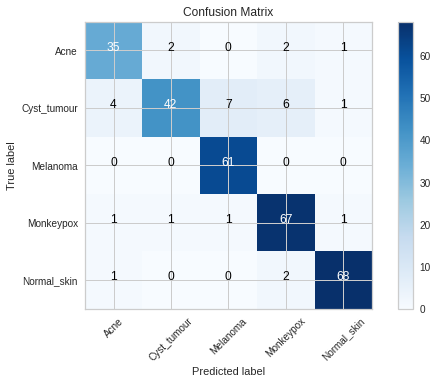

In [ ]:
cm_plot_labels = ["Acne", "Cyst_tumour", "Melanoma", "Monkeypox", "Normal_skin"]

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

This confusion matrix shows good accuracy than the last model.

In [ ]:
test_loss, test_acc = model.evaluate(test_batches, verbose=2)

In [ ]:
from sklearn.metrics import classification_report

# labels = ["Acne", "Cyst_tumour_and_skintags", "Monkeypox", "Melanoma", "Normal_skin"]

cr = classification_report(test_labels, predictions.argmax(axis=1))

In [ ]:
# Predicting the Test set results

from sklearn.metrics import classification_report


print(classification_report(test_labels, predictions.argmax(axis=1),target_names = cm_plot_labels ))

              precision    recall  f1-score   support

        Acne       0.85      0.88      0.86        40
 Cyst_tumour       0.93      0.70      0.80        60
    Melanoma       0.88      1.00      0.94        61
   Monkeypox       0.87      0.94      0.91        71
 Normal_skin       0.96      0.96      0.96        71

    accuracy                           0.90       303
   macro avg       0.90      0.90      0.89       303
weighted avg       0.90      0.90      0.90       303

